# NFL Data EDA
___
The objectives of this notebook are as follows:
- Perform initial exploratory data analysis to identify unique storylines and insights
- Engineer new features that will be useful for the above goal in addition to modeling (our next stage)
- Visualize the data to draw out valuable perspective and illustration

## 2018 In Review
We are now at the end of yet another exciting, frustrating, and fun fantasy football season. While I'm certainly looking forward to future stages in this project like weekly individual player projections, I believe that this extensive EDA for the year in review will be incredibly valuable.

I hope to not only draw out who the top performers were, but also intend to dig several layers deeper to find who was the most consistent and who actually would have pushed players to a fantasy championship!

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## // Quarterbacks

In [127]:
qbs = pd.read_csv('./data/qb_stats_2018.csv', index_col='Unnamed: 0')
# Let's make sure to only look at "active" players aka `active == 1.0`
qbs = qbs.loc[qbs.active==1.0, :]
# And only through Week 16 for now, the week when *most* leagues play their championship game
qbs = qbs[qbs['week'] != 17]
qbs.head()

,player,pass_comp,pass_att,pass_pct,pass_yds,yds_per_att,pass_TD,pass_INT,sacks_taken,rush_att,rush_yds,rush_TD,fumbles_lost,active,fpoints,fpoints_g,own_pct,week,team
0,Aaron Rodgers,20.0,30.0,66.7,286.0,9.5,3.0,0.0,2.0,1.0,15.0,0.0,0.0,1.0,24.9,24.9,99.1,1,GB
1,Alex Smith,21.0,30.0,70.0,255.0,8.5,2.0,0.0,3.0,8.0,14.0,0.0,0.0,1.0,19.6,19.6,9.1,1,WAS
2,Ben Roethlisberger,23.0,41.0,56.1,335.0,8.2,1.0,3.0,4.0,3.0,16.0,0.0,2.0,1.0,9.0,9.0,96.6,1,PIT
16,Drew Brees,37.0,45.0,82.2,439.0,9.8,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,31.6,31.6,97.1,1,NO
18,Eli Manning,23.0,37.0,62.2,224.0,6.1,0.0,1.0,2.0,1.0,2.0,0.0,0.0,1.0,7.2,7.2,14.1,1,NYG


In [128]:
qbs.groupby('player')['fpoints'].mean().sort_values(ascending=False)[:12]

player
Patrick Mahomes       26.646667
Ben Roethlisberger    21.846667
Matt Ryan             21.713333
Aaron Rodgers         20.766667
Ryan Fitzpatrick      20.725000
Deshaun Watson        20.660000
Andrew Luck           20.300000
Drew Brees            20.286667
Cam Newton            20.185714
Mitch Trubisky        19.446154
Russell Wilson        19.400000
Jared Goff            19.086667
Name: fpoints, dtype: float64

#### Our Top 12 features some familiar names from past seasons as well as newcomers:
- Patrick Mahomes
- Deshaun Watson
- Mitch Trubisky

In [129]:
# Looking at the QBs with the greatest variance
list(qbs.groupby('player')['fpoints'].std().sort_values(ascending=False)[:12].index)

['Ryan Fitzpatrick',
 'Mitch Trubisky',
 'Nick Foles',
 'Drew Brees',
 'Jared Goff',
 'Tyrod Taylor',
 'Blake Bortles',
 'Marcus Mariota',
 'Josh Allen',
 'Deshaun Watson',
 'Brock Osweiler',
 'Chase Daniel']

In [130]:
list(set(list(qbs.groupby('player')['fpoints'].mean().sort_values(ascending=False)[:12].index)).intersection(list(qbs.groupby('player')['fpoints'].std().sort_values(ascending=False)[:12].index)))


['Deshaun Watson',
 'Jared Goff',
 'Mitch Trubisky',
 'Ryan Fitzpatrick',
 'Drew Brees']

So out of our Top 12 QBs, **Goff, Trubisky, Rodgers, Fitzpatrick, and Brees** all also rank within the Top 12 of QBs with the highest amount of variance in there performance.

In [131]:
# So if performance AND consistency is what you're looking in your QB, go after one of these Top 7 guys for 2019
good_consistent_qbs = list(set(list(qbs.groupby('player')['fpoints'].mean().sort_values(ascending=False)[:12].index)).difference(list(qbs.groupby('player')['fpoints'].std().sort_values(ascending=False)[:12].index)))
good_consistent_qbs

['Andrew Luck',
 'Ben Roethlisberger',
 'Patrick Mahomes',
 'Russell Wilson',
 'Matt Ryan',
 'Cam Newton',
 'Aaron Rodgers']

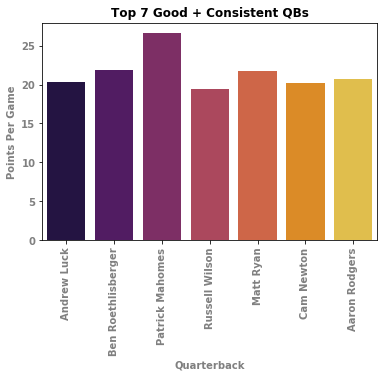

In [132]:
sns.barplot(x= qbs.groupby('player')['fpoints'].mean().sort_values(ascending=False)[good_consistent_qbs].index, y=qbs.groupby('player')['fpoints'].mean().sort_values(ascending=False)[good_consistent_qbs].values,
           palette= 'inferno')
plt.xticks(rotation=90, weight='bold', color= 'grey')
plt.xlabel('Quarterback', weight='bold', color = 'grey')
plt.yticks(weight='bold', color= 'grey')
plt.ylabel('Points Per Game', weight='bold', color = 'grey')
plt.title("Top 7 Good + Consistent QBs", weight = 'bold');


> ### Instead of simply looking at the overall performances however, one thing that puts your team over the top more than others in fantasy is being consistently good instead of having a couple great games. With that in mind, let's develop some consistency ratings for our QBs.

> *One thing to note, most leagues play with only one QB slot, so if your QB is not finishing as a Top-12 option each week, they are a liability. Looking at consistent Top 12 finishers is where we'll start below.

In [133]:
# Displaying the necessary info for one instance aka for Week 1
(qbs[qbs['week']==1]['fpoints'] >= qbs.loc[qbs.week == 1, :].sort_values('fpoints', ascending = False)[0:12]['fpoints'].values[-1]).map({True:1, False:0}).values

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [135]:
top_12_key = []
for ind_week in range(1,17):
    top_12_key.extend((qbs[qbs['week']==ind_week]['fpoints'] >= qbs.loc[qbs.week == ind_week, :].sort_values('fpoints', ascending = False)[0:12]['fpoints'].values[-1]).map({True:1, False:0}).values)
qbs['top_12'] = top_12_key

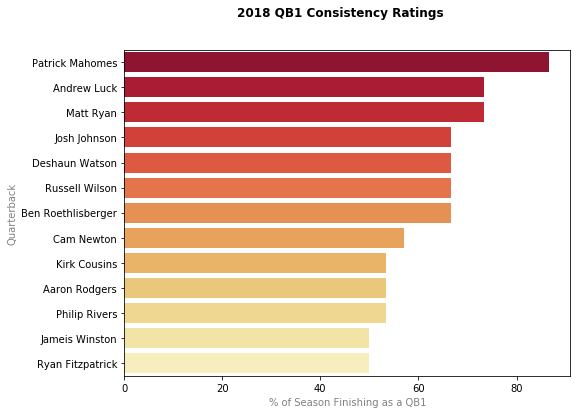

In [171]:
plt.figure(figsize=(8,6))
sns.barplot(x=(qbs.groupby('player')['top_12'].mean().sort_values(ascending = False)[:13].values)*100,\
            y=qbs.groupby('player')['top_12'].mean().sort_values(ascending = False)[:13].index,\
            palette = 'YlOrRd_r')
plt.suptitle('2018 QB1 Consistency Ratings', weight = 'bold')
plt.xlabel('% of Season Finishing as a QB1', color = 'grey')
plt.ylabel('Quarterback', color = 'grey')
plt.savefig('assets/2018_QB1_Consistency_Ratings.png');

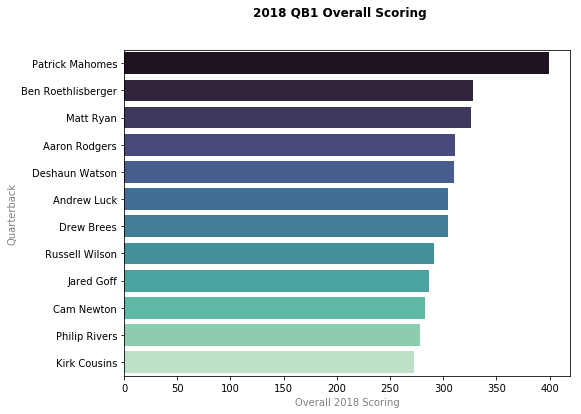

In [172]:
plt.figure(figsize=(8,6))
sns.barplot(x=qbs.groupby('player')['fpoints'].sum().sort_values(ascending = False)[:12].values,\
            y=qbs.groupby('player')['fpoints'].sum().sort_values(ascending = False)[:12].index,\
            palette = 'mako')
plt.suptitle('2018 QB1 Overall Scoring', weight = 'bold')
plt.xlabel('Overall 2018 Scoring', color = 'grey')
plt.ylabel('Quarterback', color = 'grey')
plt.savefig('assets/2018_QB1_Overall_scoring.png');

#### There we go! One more point of interest might be comparing where players were drafted (Average Draft Position or ADP) against where they actually finished.

In [173]:
# Make an ADP differential column showing the difference between where they were drafted and where they finished